In [1]:
!pip install pandas
!pip install numpy
!pip install altair
!pip install altair_data_server
!pip install kaggle

     --------------------------------------- 11.2/11.2 MB 14.9 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\Axl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\Axl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
     ------------------------------------- 813.6/813.6 kB 10.3 MB/s eta 0:00:00
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\Axl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip avai

In [4]:
import pandas as pd                     
import matplotlib.pyplot as plt 
import numpy as np    
import altair as alt
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [7]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rodolfofigueroa/spotify-12m-songs
!mv spotify-12m-songs.zip songs.zip
!unzip songs.zip

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "c:\Users\Axl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts\kaggle-script.py", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.13', 'console_scripts', 'kaggle')())
  File "c:\Users\Axl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts\kaggle-script.py", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\importlib\metadata\__init__.py", line 171, in load
    module = import_module(match.group('module'))
  File "C:\Program Files\WindowsApps\Pytho

In [9]:
songs = pd.read_csv('/content/tracks_features.csv')
songs.head()
songs.isnull().sum()

FileNotFoundError: [Errno 2] No such file or directory: '/content/tracks_features.csv'

In [ ]:
songs.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

## Introduction
- First, we read in the data and find that there are no missing values.
- Next, we want to analyze different trends based on audio-based metrics.
- Out of the total columns, we can see that 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duraton_ms', 'time_signature', 'year', and 'release_date' are all potential variables related to popularity

In [ ]:
songs2 = songs.drop(columns = ['id', 'name',
                               'album','album_id',
                               'artists', 'artist_ids',
                               'track_number', 'disc_number'])

In [ ]:
songs2.head()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [ ]:
songs2.isnull().sum()

explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

From the above, we can see that there are no missing null values in our songs2 dataset.

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

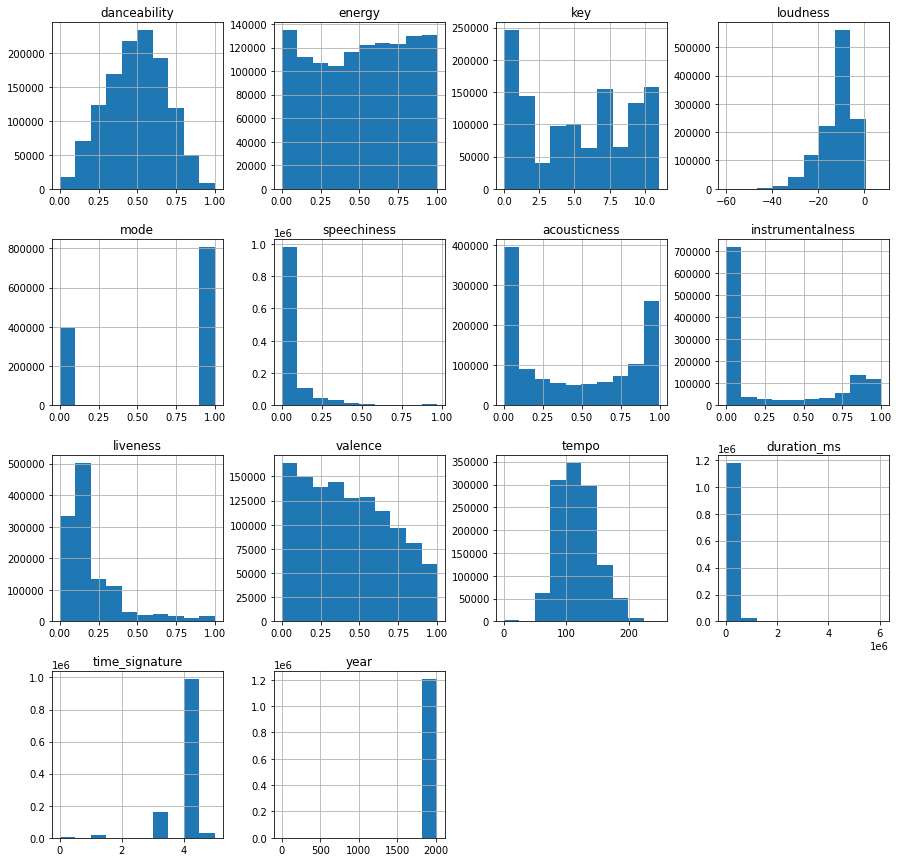

In [ ]:
songs2.hist(figsize=(15,15))

In [ ]:
songs2.rename(columns = {'key': 'Overall Key', 'mode': 'Major/Minor'})

,explicit,danceability,energy,Overall Key,loudness,Major/Minor,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,False,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,False,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,False,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,False,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


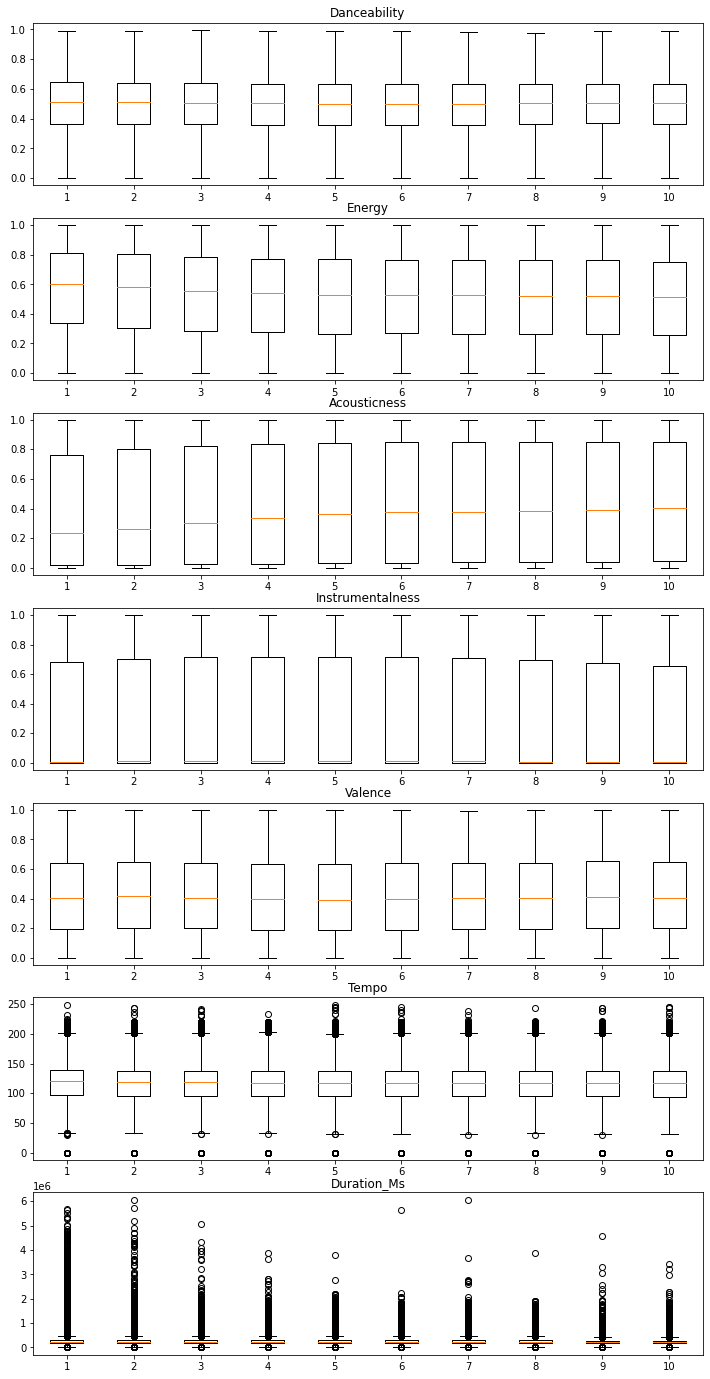

In [ ]:
attributes = list(songs.columns[9:21])
atts_by_track = []

for att in attributes:
    att_by_track = [songs[
                    songs['track_number']==track_number][att]
                    for track_number in range(1,11)]
    atts_by_track.append(att_by_track)

skipped_atts = ['key','loudness','mode','liveness','speechiness']
plt_height_factor = 3.5
fig, ax = plt.subplots(len(attributes) - len(skipped_atts), 1)
fig.set_size_inches(12,
                    plt_height_factor*(len(attributes)-len(skipped_atts)))
counter = 0
for a in range(0, len(attributes)):
    if attributes[a] not in skipped_atts:
        ax[counter].boxplot(atts_by_track[a])
        ax[counter].set_title(attributes[a].title())
        counter += 1
plt.show()

Checking the relationship between tempo and danceability


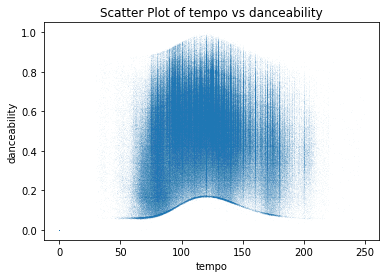

In [ ]:
plt.scatter(songs2['tempo'], songs2['danceability'], s=0.0001)
plt.xlabel('tempo')
plt.ylabel('danceability')
plt.title('Scatter Plot of tempo vs danceability')
plt.show()

Scatter plot looks too congested, we will downsample the data

Text(0, 0.5, 'Danceability')

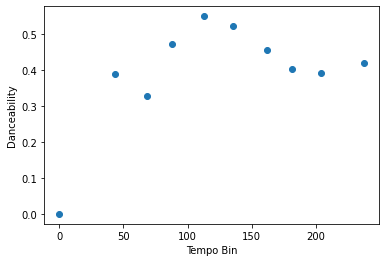

In [ ]:
songs2['tempo_bin'] = pd.cut(songs2['tempo'], bins=10)
songs2['tempo_bin'] = pd.Categorical(songs2['tempo_bin'], categories=songs2['tempo_bin'].cat.categories)
songs2_downsampled = songs2.groupby('tempo_bin').mean()
plt.scatter(songs2_downsampled['tempo'], songs2_downsampled['danceability'])
plt.xlabel('Tempo Bin')
plt.ylabel('Danceability')

Finding a nice year to start analysing songs from to prevent clustering 

In [ ]:
max_year = songs2['year'].max()
##print(max_year)
min_year = songs2[songs2['year'] > 0]['year'].min()
##print(min_year)
year_counts = songs2['year'].value_counts()
print(year_counts.head(60))

2020    69726
2019    67276
2006    56945
2007    56287
2018    56167
2017    51308
2008    50475
2005    49977
2013    49048
2016    47427
2015    46558
2011    45642
2009    45563
2012    45108
2014    45005
2010    44550
2004    38696
2003    34996
2002    30861
2000    30575
2001    29378
1999    25931
1998    21013
1997    20229
1996    17840
1995    17417
1994    14130
1993    11017
1992     9639
1991     8380
1990     7453
1989     5095
1988     4545
1987     3314
1986     2727
1985     2596
1984     2571
1980     2119
1979     2106
1976     1985
1983     1977
1977     1962
1972     1938
1978     1923
1981     1897
1975     1806
1973     1762
1982     1754
1974     1389
1969     1247
1971     1202
1970     1110
1965      933
1966      932
1968      930
1967      916
1963      905
1962      842
1959      830
1964      729
Name: year, dtype: int64


1980 looks to be the nicest breaking point. Plotting and displaying trendlines for several song attributes coming from 1980 onwards

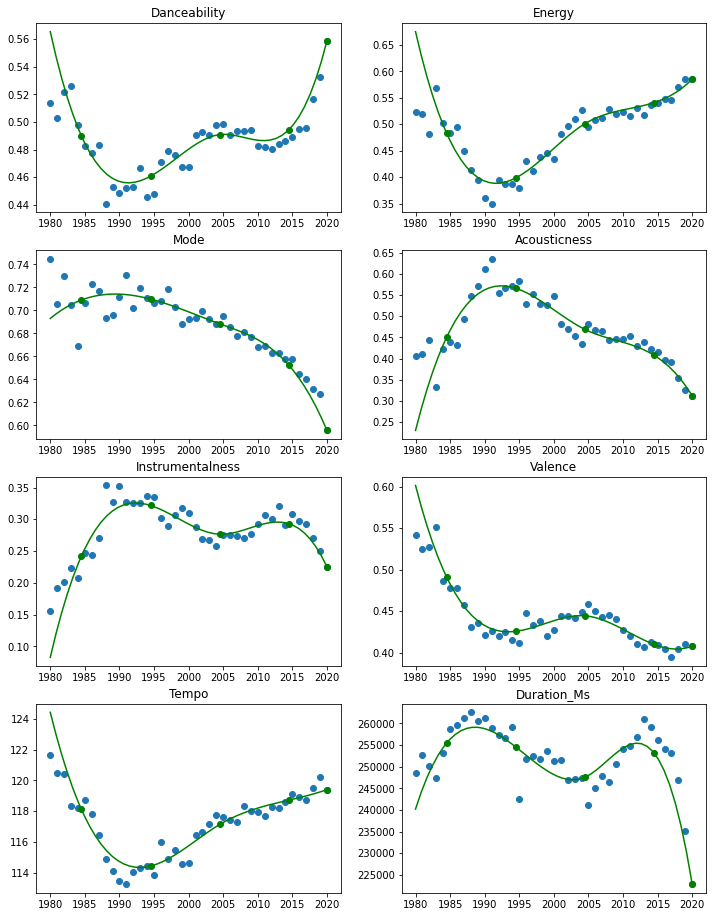

In [ ]:
from scipy.interpolate import CubicSpline

songs_year = songs2[songs2['year'] >= 1980]
songs_year = songs_year[['year'] + attributes]
songs_year = songs_year.groupby('year').mean()
songs_year['year'] = songs_year.index

songs_year['decade'] = songs_year.index // 10 % 10 * 10
songs_year['decade'] = songs_year.decade.apply(lambda d: str(d).zfill(2))
songs_decade = songs_year.groupby('decade').mean()
songs_decade = songs_decade.sort_values(by='year')

year = list(songs_year.index)
decade = list(songs_decade.year)
#print(songs_decade)

fig, ax = plt.subplots(4, 2)
fig.set_size_inches(12, 16)
counter = 0

if 'mode' in skipped_atts:
    skipped_atts.remove('mode')
    
for att in attributes:
    if att in skipped_atts:
        continue
    row = counter // 2
    col = counter % 2
    counter += 1
    
    data = list(songs_year[att])
    decade_data = list(songs_decade[att])
    #tried polynomial fitting, but fit is not great
    #quad_fit = np.poly1d(np.polyfit(year, data, 5))
    lin = np.linspace(1980, 2020, 50)
    cs = CubicSpline(decade, songs_decade[att])
    
    ax[row,col].set_title(att.title())
    ax[row,col].scatter(year, data)
    ax[row,col].scatter(decade, decade_data, color='green')
    #plt.plot(quad_lin, quad_fit(quad_lin), color='green')
    ax[row,col].plot(lin, cs(lin), color='green')
    
plt.show();